In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spam = pd.read_csv('email spam.csv')
spam.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
spam.shape

(5572, 2)

In [4]:
spam.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


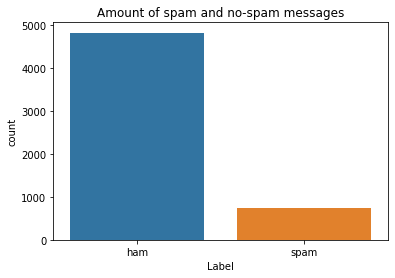

In [29]:
sns.countplot(data = spam, x= spam["Label"]).set_title("Amount of spam and no-spam messages")
plt.show()

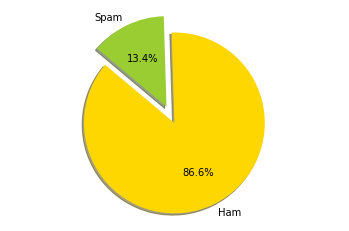

In [32]:
count_Class=pd.value_counts(spam.Label, sort= True)

# Data to plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['gold', 'yellowgreen'] # 'lightcoral', 'lightskyblue'
explode = (0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [5]:
X = spam["EmailText"]
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: EmailText, dtype: object

In [6]:
y = spam["Label"]
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Label, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()  
trainCV = cv.fit_transform(X_train)
testCV = cv.transform(X_test)

In [9]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(trainCV,y_train)
pred_NB = naive_bayes.predict(testCV)

In [10]:
from sklearn.metrics import accuracy_score
Accuracy_Score_NB = accuracy_score(y_test, pred_NB)
Accuracy_Score_NB

0.9874439461883409

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(trainCV, y_train)
pred_knn = classifier_knn.predict(testCV)

In [12]:
Accuracy_Score_knn = accuracy_score(y_test, pred_knn)
Accuracy_Score_knn

0.9085201793721973

In [13]:
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear')
classifier_svm_linear.fit(trainCV, y_train)
pred_svm_linear = classifier_svm_linear.predict(testCV)

In [14]:
Accuracy_Score_SVM_Linear = accuracy_score(y_test, pred_svm_linear)
Accuracy_Score_SVM_Linear

0.979372197309417

In [15]:
classifier_svm_rbf = SVC(kernel = 'rbf')
classifier_svm_rbf.fit(trainCV, y_train)
pred_svm_rbf = classifier_svm_rbf.predict(testCV)

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
Accuracy_Score_SVM_Gaussion = accuracy_score(y_test, pred_svm_rbf)
Accuracy_Score_SVM_Gaussion

0.8511210762331839

In [17]:
classifier_svm_poly = SVC(kernel = 'poly')
classifier_svm_poly.fit(trainCV, y_train)
pred_svm_poly = classifier_svm_poly.predict(testCV)

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
Accuracy_Score_SVM_Polynomial = accuracy_score(y_test, pred_svm_poly)
Accuracy_Score_SVM_Polynomial

0.8511210762331839

In [19]:
classifier_svm_sigmoid = SVC(kernel = 'sigmoid')
classifier_svm_sigmoid.fit(trainCV, y_train)
pred_svm_sigmoid = classifier_svm_sigmoid.predict(testCV)

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
Accuracy_Score_svm_Sigmoid = accuracy_score(y_test, pred_svm_sigmoid)
Accuracy_Score_svm_Sigmoid

0.8511210762331839

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(trainCV, y_train)
pred_dt = classifier_dt.predict(testCV)

In [22]:
Accuracy_Score_dt = accuracy_score(y_test, pred_dt)
Accuracy_Score_dt

0.9659192825112107

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(trainCV, y_train)
pred_rf = classifier_rf.predict(testCV)

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
Accuracy_Score_rf = accuracy_score(y_test, pred_rf)
Accuracy_Score_rf

0.9623318385650225

In [26]:
import xgboost as xgb
classifier_xg = xgb.XGBClassifier()
classifier_xg.fit(trainCV, y_train)
pred_xg = classifier_xg.predict(testCV)

In [27]:
Accuracy_Score_xg = accuracy_score(y_test, pred_xg)
Accuracy_Score_xg

0.9632286995515695

In [28]:
print("K-Nearest Neighbors =",Accuracy_Score_knn)
print("Naive Bayes =",Accuracy_Score_NB)
print("Support Vector Machine Linear =",Accuracy_Score_SVM_Linear)
print("Support Vector Machine Gaussion =",Accuracy_Score_SVM_Gaussion)
print("Support Vector Machine Polynomial =",Accuracy_Score_SVM_Polynomial)
print("Support Vector Machine Sigmoid =",Accuracy_Score_svm_Sigmoid)
print("Decision Tree =",Accuracy_Score_dt)
print("Random Forest =",Accuracy_Score_rf)
print("XgBoost =",Accuracy_Score_xg)

K-Nearest Neighbors = 0.9085201793721973
Naive Bayes = 0.9874439461883409
Support Vector Machine Linear = 0.979372197309417
Support Vector Machine Gaussion = 0.8511210762331839
Support Vector Machine Polynomial = 0.8511210762331839
Support Vector Machine Sigmoid = 0.8511210762331839
Decision Tree = 0.9659192825112107
Random Forest = 0.9623318385650225
XgBoost = 0.9632286995515695
